In [3]:
import tensorflow as tf
#from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras import backend as K 
import pickle


Using TensorFlow backend.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
img_entrenamiento = []
img_label = []
tipo = -0.2

for dirname, _, filenames in os.walk('./drive/My Drive/proyecto/train/'):
  print(tipo)
  print(dirname)
  for filename in filenames:
      img=cv2.imread(os.path.join(dirname, filename))
      if filename.endswith(".jpg"):
          img = img/255.0
          img_entrenamiento.append(img)
          img_label.append(tipo)
          #plt.figure()
          #plt.imshow(img)
          #plt.show()
  tipo += 0.2

In [0]:
img_val = []
img_label_val = []
tipo = 0.0

In [32]:
for dirname, _, filenames in os.walk('./drive/My Drive/proyecto/validation/'):
  print(tipo)
  print(dirname)
  for filename in filenames:
      img=cv2.imread(os.path.join(dirname, filename))
      if filename.endswith(".jpg"):
          #img = img/255.0
          img_val.append(img)
          img_label_val.append(tipo)
          #plt.figure()
          #plt.imshow(img)
          #plt.show()
  tipo += 0.2 

1.2
./drive/My Drive/proyecto/validation/
1.4
./drive/My Drive/proyecto/validation/salay color
1.5999999999999999
./drive/My Drive/proyecto/validation/tinkuy color
1.7999999999999998
./drive/My Drive/proyecto/validation/caporales color
1.9999999999999998
./drive/My Drive/proyecto/validation/diablada color
2.1999999999999997
./drive/My Drive/proyecto/validation/morenada color


In [0]:
entrenamiento_array = np.asarray(img_entrenamiento).astype(np.float32)
label_array =  np.asarray(img_label).astype(np.float32)
validacion_array = np.asarray(img_val).astype(np.float32)
label_val_array =  np.asarray(img_label_val).astype(np.float32)

In [0]:
open("./drive/My Drive/proyecto/entrenamiento.p", "w")
pickle.dump(entrenamiento_array, open("./drive/My Drive/proyecto/entrenamiento.p", "wb") )
open("./drive/My Drive/proyecto/validacion.p", "w")
pickle.dump(validacion_array, open("./drive/My Drive/proyecto/validacion.p", "wb") )


In [0]:
open("./drive/My Drive/proyecto/entrenamiento_labels.p", "w")
pickle.dump(label_array, open("./drive/My Drive/proyecto/entrenamiento_labels.p", "wb") )
open("./drive/My Drive/proyecto/validacion_labels.p", "w")
pickle.dump(label_val_array, open("./drive/My Drive/proyecto/validacion_labels.p", "wb") )

In [0]:
entrenamiento_array = pickle.load( open( "./drive/My Drive/entrenamiento.p", "rb" ) )
validacion_array = pickle.load( open( "./drive/My Drive/validacion.p", "rb" ) )
label_array = pickle.load( open( "./drive/My Drive/entrenamiento_labels.p", "rb" ) )
label_val_array = pickle.load( open( "./drive/My Drive/validacion_labels.p", "rb" ) )

In [0]:
print(entrenamiento_array.shape)
print(label_val_array.shape)

(1268, 240, 320, 3)
(25,)


In [0]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, 240, 320) 
else: 
    input_shape = (240, 320, 3) 

In [0]:
model = Sequential()
model.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 5 , activation = 'softmax'))
model.compile(loss ='categorical_crossentropy',
              optimizer ='adam',
              metrics = ['categorical_accuracy','accuracy']) 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = "./drive/My Drive/proyecto/train"
validation_data_dir = "./drive/My Drive/proyecto/validation"

train_datagen = ImageDataGenerator(
                rescale = 1. / 255,
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 

test_datagen = ImageDataGenerator(rescale = 1. / 255) 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (240, 320),
    batch_size = 16,
    class_mode ='categorical') 

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (240, 320),
    batch_size = 16,
    class_mode ='categorical') 

Found 1268 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [0]:
model = keras.models.load_model("./drive/My Drive/proyecto/modeloBIEN")

In [11]:
model.fit_generator(train_generator,
    steps_per_epoch = 25,
    epochs = 100,
    validation_data = validation_generator, 
    validation_steps = 25)

Epoch 1/100
25/25 [==============================] - 69s 3s/step - loss: 0.0630 - categorical_accuracy: 0.9800 - accuracy: 0.9800 - val_loss: 2.3636 - val_categorical_accuracy: 0.7215 - val_accuracy: 0.7215
Epoch 2/100
25/25 [==============================] - 67s 3s/step - loss: 0.0379 - categorical_accuracy: 0.9900 - accuracy: 0.9900 - val_loss: 3.8899 - val_categorical_accuracy: 0.5566 - val_accuracy: 0.5566
Epoch 3/100
25/25 [==============================] - 63s 3s/step - loss: 0.0473 - categorical_accuracy: 0.9820 - accuracy: 0.9820 - val_loss: 2.4735 - val_categorical_accuracy: 0.6424 - val_accuracy: 0.6424
Epoch 4/100
25/25 [==============================] - 66s 3s/step - loss: 0.0529 - categorical_accuracy: 0.9820 - accuracy: 0.9820 - val_loss: 6.2246 - val_categorical_accuracy: 0.6764 - val_accuracy: 0.6764
Epoch 5/100
25/25 [==============================] - 67s 3s/step - loss: 0.0623 - categorical_accuracy: 0.9825 - accuracy: 0.9825 - val_loss: 1.1848 - val_categorical_accur

In [0]:
model.save("./drive/My Drive/proyecto/modeloBIEN")

In [0]:
model.fit_generator(train_generator,
    steps_per_epoch = 25,
    epochs = 100,
    validation_data = validation_generator, 
    validation_steps = 25)

In [0]:
model.save("./drive/My Drive/proyecto/modeloBIEN")

In [0]:
"""model = keras.Sequential([
  keras.layers.Flatten(input_shape = (240,320)),
  keras.layers.Dense(1268, activation='relu'),
  keras.layers.Dense(1268, activation='relu'),
  keras.layers.Dense(5 ,activation='softmax')
])"""

model = keras.Sequential()
model.add(Conv2D(32, kernel_size = (2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(entrenamiento_array,
          label_array,
          batch_size=30,
          epochs=40,
          validation_data=(validacion_array,label_val_array))

In [0]:
validacion_array.resize(25,240,320,3)

In [0]:
plt.imshow(validacion_array[2])
plt.show

In [26]:
loss, acc = model.evaluate(validacion_array,  label_val_array, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

NameError: ignored

In [39]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'caporales color': 0, 'diablada color': 1, 'morenada color': 2, 'salay color': 3, 'tinkuy color': 4}
{'caporales color': 0, 'diablada color': 1, 'morenada color': 2, 'salay color': 3, 'tinkuy color': 4}


<function matplotlib.pyplot.show>

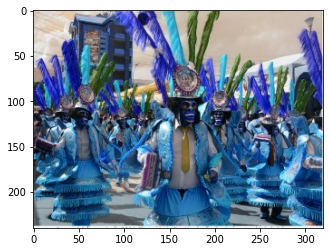

In [47]:
plt.imshow(validacion_array[23])
plt.show

In [35]:
res = model.predict(validacion_array,1)
res

array([[6.97350409e-03, 2.15305063e-09, 1.92743689e-02, 9.73731041e-01,
        2.11125807e-05],
       [9.31463728e-04, 3.72752169e-04, 9.98693168e-01, 2.56984436e-06,
        1.60460569e-08],
       [9.99999642e-01, 8.81860153e-32, 0.00000000e+00, 4.05280872e-07,
        0.00000000e+00],
       [2.83552808e-08, 8.89803164e-09, 1.92356936e-07, 8.46984172e-09,
        9.99999762e-01],
       [1.00000000e+00, 0.00000000e+00, 1.52694917e-14, 3.19706115e-14,
        8.18561905e-30],
       [9.99987960e-01, 6.42525464e-08, 1.19424685e-05, 4.84003770e-08,
        2.14475979e-13],
       [8.02186854e-17, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [7.24081383e-06, 8.34604539e-16, 2.38338377e-11, 7.70631345e-08,
        9.99992728e-01],
       [9.99064624e-01, 1.99853831e-11, 9.21949046e-04, 1.34505444e-05,
        1.56809548e-12],
       [3.95726860e-02, 5.12215652e-11, 3.03149406e-13, 1.96193010e-01,
        7.64234304e-01],
       [2.53573107e-05, 1.7001